In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,3],[4,5,6])
plt.title('그래프')
plt.show()

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 폰트 확인하기
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

* 데이터 수집     
https://data.seoul.go.kr/dataList/1/literacyView.do            
파일을 utf-8로 변환하여 사용

# 데이터 불러오기

In [4]:
df = pd.read_csv('서울시 코로나19 확진자 현황.csv')

C:\Users\onlyo\AppData\Local\Temp\ipykernel_11160\2635498346.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('서울시 코로나19 확진자 현황.csv')


In [5]:
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


# 데이터 확인 및 전처리

## 컬럼별 데이터 확인
- .unique() 함수 사용: unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

In [7]:
df['환자번호'].unique() #환자번호, 국저, 환자정보, 조치사항, 이동경로 등은 모두 null만 들어있는 것을 확인.

array([nan])

## 불필요한 컬럼 삭제
- drop() 사용

In [12]:
df.drop(columns = ['환자번호','국적','환자정보','조치사항','상태','이동경로','등록일','수정일','노출여부'], inplace = True)

In [13]:
df

,연번,확진일,지역,여행력,접촉력
0,99550,2021-09-28,기타,NaN,감염경로 조사중
1,99549,2021-09-28,기타,NaN,감염경로 조사중
2,99548,2021-09-28,기타,NaN,감염경로 조사중
3,99547,2021-09-28,기타,NaN,감염경로 조사중
4,99546,2021-09-28,기타,NaN,감염경로 조사중
...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉
99546,4,2020-01-30,마포구,중국,해외유입
99547,3,2020-01-30,종로구,NaN,종로구 집단발병
99548,2,2020-01-30,중랑구,중국,해외유입


## 자료형 변환
- .dtypes 사용
- 확진일과 같은 날짜형들은 데이터타입로 변환하는 것이 더 좋음
- 지역 등은 카테고리형으로 사용
- 여행력, 접촉력은 object
- 상태는 카테고리형으로
- 카테고리형으로 변환하는 이유는 메모리를 적게 사용

In [14]:
# 자료형 확인
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
dtype: object

In [19]:
# 확진일 --> datetime
df['확진일'] = pd.to_datetime(df['확진일'])

In [22]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
dtype: object

### 고유한 값들이 몇개가 들어가 있는지 확인하는 함수: nunique()

In [21]:
# 지역의 공백 제거
df['지역'].nunique()

29

In [23]:
df['지역'].unique() #공백이 있는 구가 존재

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [29]:
df['지역'] = df['지역'].str.strip() #모든 항목에 적용할 경우 .str. 붙이기

In [30]:
df['지역'].nunique()

27

In [31]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [33]:
# 지역, 상태 --> category (지역의 공백 제거)
df['지역'] = df['지역'].astype('category') #카테고리형으로 변환

In [34]:
df.dtypes #카테고리형은 데이터에 문자열 형태를 적용 시 다시 object로 돌아감

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
dtype: object

In [36]:
# 정보
df.info() #결측치가 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ MB


## 결측치 분석

In [38]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
dtype: int64

In [39]:
df

,연번,확진일,지역,여행력,접촉력
0,99550,2021-09-28,기타,NaN,감염경로 조사중
1,99549,2021-09-28,기타,NaN,감염경로 조사중
2,99548,2021-09-28,기타,NaN,감염경로 조사중
3,99547,2021-09-28,기타,NaN,감염경로 조사중
4,99546,2021-09-28,기타,NaN,감염경로 조사중
...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉
99546,4,2020-01-30,마포구,중국,해외유입
99547,3,2020-01-30,종로구,NaN,종로구 집단발병
99548,2,2020-01-30,중랑구,중국,해외유입


# 구 별 확진자 동향

## 확진일-구별 확진자수 집계

### 피봇테이블 만들기

In [43]:
df_gu = pd.pivot_table(df, index = '확진일', columns = '지역', values = '연번', aggfunc = 'count', margins = True )

In [45]:
df_gu #all은 서울시의 전체 확인자 수를 알 수 있고, 행의 all은 구별 누적 확진자수를 알 수 있음

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


### 서울시 일별 추가확진자 동향

In [48]:
s_date = df_gu['All'][:-1] #해당 데이터는 시리즈
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [51]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending = False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

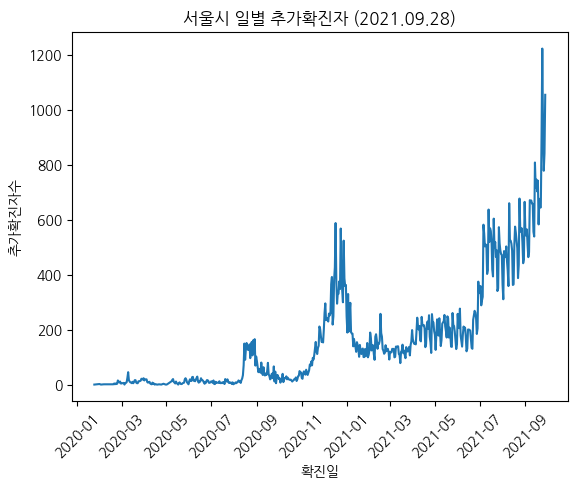

In [53]:
# 서울시 일별 추가확진자 시각화
# x축에는 확진일, y축은 확진자수 >> 시리즈의 인덱스가 x, values가 y로 

x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 추가확진자 (2021.09.28)')
plt.xlabel('확진일')
plt.ylabel('추가확진자수')
plt.xticks(rotation = 45)
plt.show()

### 서울시 구별 누적확진자 비교

In [54]:
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [64]:
# 서울시 구별 누적확진자 많은 순으로 보기
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending = False)

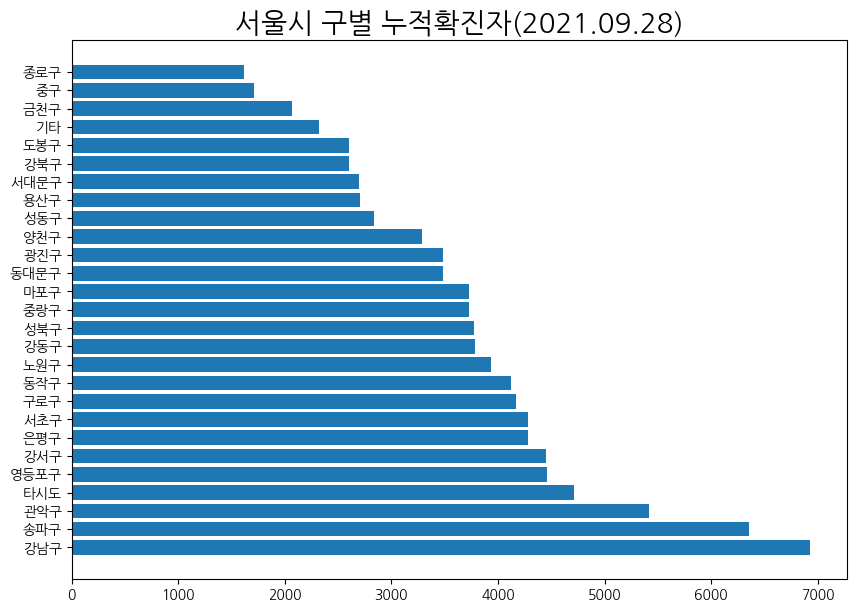

In [65]:
# 서울시 구별 누적확진자 많은 순으로 시각화
#barh는 가로형으로 
x = s_gu.index
y = s_gu.values
plt.figure(figsize = (10,7))
plt.title('서울시 구별 누적확진자(2021.09.28)', size = 20)
plt.barh(x, y)
plt.show()

### 최근일 기준 지역별 추가확진자 

In [66]:
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [74]:
s_gu = df_gu.iloc[-2][:-1]
s_gu = s_gu.sort_values(ascending = False)

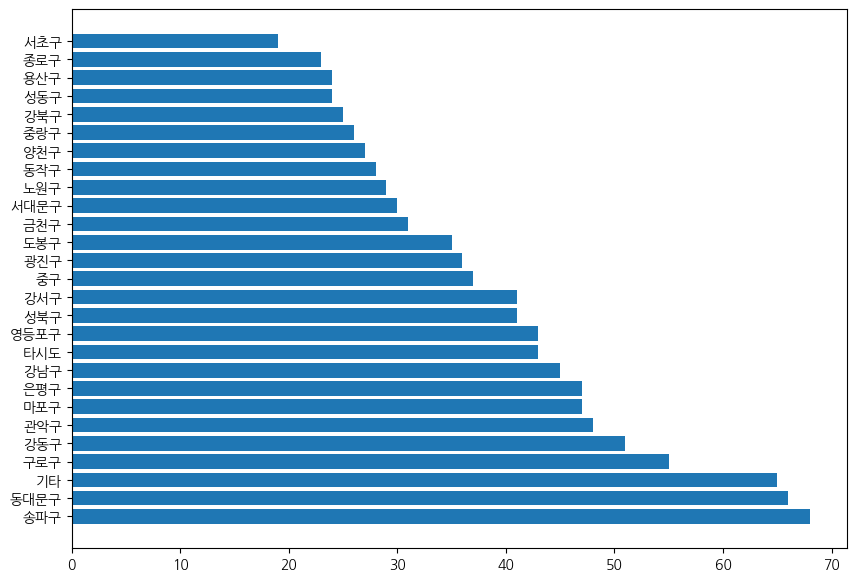

In [75]:
x = s_gu.index
y = s_gu.values
plt.figure(figsize = (10,7))
plt.barh(x,y)
plt.show()

## 접촉력에 따른 확진 분석

### 접촉력에 따른 확진 건수 best10

In [82]:
df['접촉력'].value_counts()[:10].to_frame()

,count
접촉력,
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277


### 최근월 접촉력에 따른 확진 건수 best10
* 2021-09

In [86]:
df[(df['확진일'].dt.year==2021)&(df['확진일'].dt.month==9)]['접촉력'].value_counts()[:10].to_frame()

,count
접촉력,
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
